<a href="https://colab.research.google.com/github/C23-PC647-SABI/SABI-ML/blob/main/Image_Classification_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/C23-PC647\ Capstone\ Group/ML

/content/drive/Shareddrives/C23-PC647 Capstone Group/ML


In [ ]:
!ls

 bisindo_model_cnn.tar			   img_arr	    'Object detection'
'Copy of Image_Classification_CNN.ipynb'   img_arr.npy	    'Research Paper'
 Dataset				  'labels (1).txt'   saved_model
 file1.txt				   label_sabi.txt    server.log
 Image_Classification_CNN.ipynb		   model.tflite


In [ ]:
!pwd

/content/drive/Shareddrives/C23-PC647 Capstone Group/ML


# Import Dependencies

In [ ]:
# OpenCV
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import shutil
import json
import tempfile
import requests
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Preprocessing

In [ ]:
# # Path untuk set pelatihan, validasi, dan pengujian
# train_path = "Dataset/Dataset BISINDO 2/Train"
# valid_path = "Dataset/Dataset BISINDO 2/Validation"
# test_path = "Dataset/Dataset BISINDO 2/Test"

# # Path data asli
# original_data_path = "Dataset/Dataset BISINDO 2/Citra BISINDO"

# # Mendapatkan daftar folder kelas
# class_folders = os.listdir(original_data_path)

# # Membuat direktori untuk set validasi dan pengujian
# os.makedirs(valid_path, exist_ok=True)
# os.makedirs(test_path, exist_ok=True)

# # Memindahkan data ke set pelatihan, validasi, dan pengujian
# for class_folder in class_folders:
#     class_folder_path = os.path.join(original_data_path, class_folder)
#     files = os.listdir(class_folder_path)
#     train_files, validation_test_files = train_test_split(files, test_size=0.3, random_state=42)

#     # Memindahkan file ke set pelatihan
#     for file in train_files:
#         src_path = os.path.join(class_folder_path, file)
#         dst_path = os.path.join(train_path, class_folder, file)
#         if os.path.isfile(src_path):
#             shutil.copy(src_path, dst_path)

#     # Memindahkan file ke set validasi dan pengujian
#     validation_files, test_files = train_test_split(validation_test_files, test_size=0.5, random_state=42)

#     # Memindahkan file ke set validasi
#     for file in validation_files:
#         src_path = os.path.join(class_folder_path, file)
#         dst_path = os.path.join(valid_path, class_folder, file)
#         if os.path.isfile(src_path):
#             shutil.copy(src_path, dst_path)

#     # Memindahkan file ke set pengujian
#     for file in test_files:
#         src_path = os.path.join(class_folder_path, file)
#         dst_path = os.path.join(test_path, class_folder, file)
#         if os.path.isfile(src_path):
#             shutil.copy(src_path, dst_path)

In [ ]:
# Path untuk set pelatihan, validasi, dan pengujian
train_path = "Dataset/Dataset BISINDO 2/Train"
valid_path = "Dataset/Dataset BISINDO 2/Validation"
test_path = "Dataset/Dataset BISINDO 2/Test"

# Path data asli
original_data_path = "Dataset/Dataset BISINDO 2/Citra BISINDO"

# Mendapatkan daftar folder kelas
class_folders = os.listdir(original_data_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pra-pemrosesan data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Rasio pembagian data
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Membuat objek generator data untuk set pelatihan
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
      # Menggunakan subset 'training' untuk set pelatihan
)

# Menghitung jumlah data untuk setiap bagian
total_samples = train_generator.samples
num_train_samples = int(total_samples * train_ratio)
num_validation_samples = int(total_samples * validation_ratio)
num_test_samples = int(total_samples * test_ratio)

# Membuat objek generator data untuk set validasi
validation_generator = train_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
      # Menggunakan subset 'validation' untuk set validasi
)

# Membuat objek generator data untuk set pengujian
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1666 images belonging to 26 classes.
Found 365 images belonging to 26 classes.
Found 365 images belonging to 26 classes.


# Building Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Membangun arsitektur model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Menampilkan ringkasan arsitektur model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

# Model Evaluation

In [ ]:
from keras.optimizers import Adam

# Mengompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
EPOCHS = 50
history = model.fit(
      train_generator,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      use_multiprocessing=True
)

Epoch 1/50
53/53 [==============================] - 203s 4s/step - loss: 0.8009 - accuracy: 0.7611 - val_loss: 0.6901 - val_accuracy: 0.7945
Epoch 2/50
53/53 [==============================] - 235s 4s/step - loss: 0.7324 - accuracy: 0.7821 - val_loss: 0.7651 - val_accuracy: 0.7562
Epoch 3/50
53/53 [==============================] - 195s 4s/step - loss: 0.6800 - accuracy: 0.8061 - val_loss: 0.6937 - val_accuracy: 0.8192
Epoch 4/50
53/53 [==============================] - 232s 4s/step - loss: 0.6903 - accuracy: 0.7935 - val_loss: 0.5552 - val_accuracy: 0.8192
Epoch 5/50
53/53 [==============================] - 210s 4s/step - loss: 0.6449 - accuracy: 0.8103 - val_loss: 0.5664 - val_accuracy: 0.8466
Epoch 6/50
53/53 [==============================] - 204s 4s/step - loss: 0.6246 - accuracy: 0.8127 - val_loss: 0.5687 - val_accuracy: 0.8301
Epoch 7/50
53/53 [==============================] - 245s 5s/step - loss: 0.5912 - accuracy: 0.8169 - val_loss: 0.6318 - val_accuracy: 0.8082
Epoch 8/50
53

In [ ]:
# Evaluasi model pada set pengujian
model.evaluate(test_generator)

12/12 [==============================] - 22s 2s/step - loss: 0.3327 - accuracy: 0.9014


[0.3326564133167267, 0.9013698697090149]

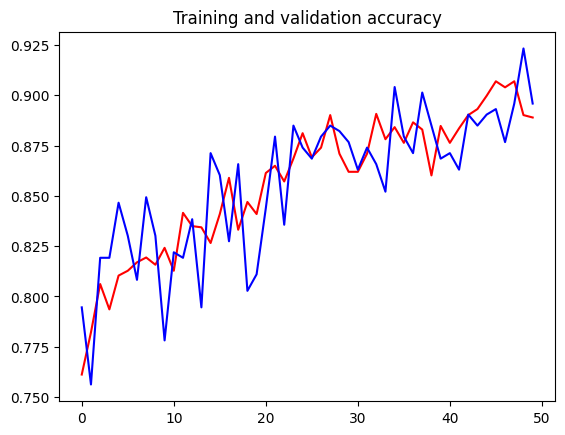

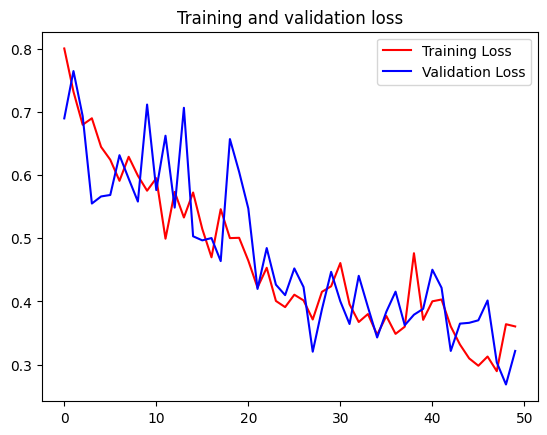

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Deployment

In [ ]:
model.save('saved_model/1/')

In [ ]:
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


export_path = /tmp/1
total 216
drwxr-xr-x 2 root root   4096 Jun  2 04:28 assets
-rw-r--r-- 1 root root     58 Jun  2 04:28 fingerprint.pb
-rw-r--r-- 1 root root  20078 Jun  2 04:28 keras_metadata.pb
-rw-r--r-- 1 root root 187120 Jun  2 04:28 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 04:28 variables


In [ ]:
!saved_model_cli show --dir {export_path} --all

2023-05-30 15:41:40.158076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 224, 224, 3)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 26)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/pre

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  24322      0 --:--:-- --:--:-- --:--:-- 24322
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://st

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 430 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.12.1 [430 MB]
Fetched 430 MB in 10s (43.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.12.1_all.deb ...
Unpacking tensorflow-model-server (2.12.1) ...
Setting up tensorflow-model-server (2.12.1) ...


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=digits_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [ ]:
test_x, test_y = test_generator.next()

In [ ]:
test_x[0:3].shape

(3, 224, 224, 3)

In [ ]:
data = json.dumps({"signature_name": "serving_default", "instances": test_x[0:3].tolist()})

In [ ]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/digits_model:predict', data=data, headers=headers)

predictions = json.loads(json_response.text)['predictions']

In [ ]:
predictions

[[3.18510888e-06,
  6.69346537e-06,
  2.11423803e-08,
  2.41519889e-08,
  2.15313281e-10,
  1.63431523e-07,
  6.07211881e-09,
  1.41821602e-06,
  3.00890396e-10,
  1.72577836e-06,
  4.4544779e-10,
  3.12045745e-06,
  1.7079692e-06,
  1.20997186e-07,
  3.89704102e-11,
  7.146852e-08,
  1.61444849e-08,
  9.10353265e-07,
  0.000481741794,
  1.93388837e-06,
  0.948171854,
  0.00685362797,
  0.0444699973,
  1.53306667e-06,
  7.62509333e-10,
  1.2819693e-07],
 [2.41235175e-05,
  1.97368358e-10,
  1.70628621e-14,
  5.96797334e-11,
  1.20810117e-09,
  2.75973126e-14,
  8.81185402e-11,
  4.11335299e-10,
  9.55178048e-14,
  2.23735441e-07,
  2.81651501e-06,
  2.05237181e-11,
  1.90676315e-14,
  4.97503246e-17,
  9.03423319e-15,
  3.70080257e-15,
  1.50591807e-15,
  2.73859841e-11,
  3.88371291e-09,
  2.13571175e-12,
  2.11540807e-09,
  2.04940698e-05,
  0.999952197,
  1.27974914e-11,
  9.17396e-12,
  6.27477732e-08],
 [2.67875517e-08,
  5.67621644e-12,
  2.30999889e-11,
  2.59751937e-14,
  1.722

In [ ]:
color = 'green' if np.argmax(predictions[0]) == np.argmax(test_y[0]) else 'red'
color

'green'

In [ ]:
test_x[0].shape

(224, 224, 3)

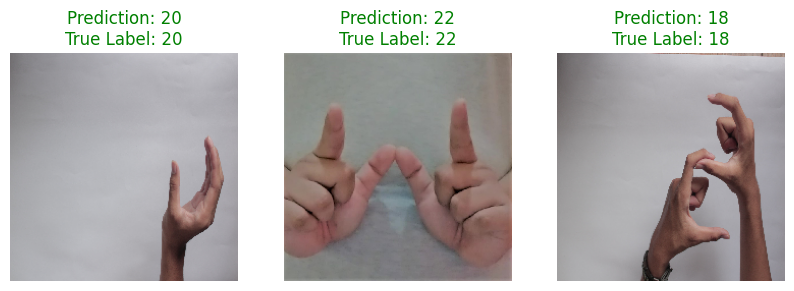

In [ ]:
plt.figure(figsize=(10,15))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(test_x[i], cmap = plt.cm.binary)
    plt.axis('off')
    color = 'green' if np.argmax(predictions[i]) == np.argmax(test_y[i]) else 'red'
    plt.title('Prediction: {}\nTrue Label: {}'.format(np.argmax(predictions[i]), np.argmax(test_y[i])), color=color)

plt.show()

In [ ]:
test_load_model = tf.keras.models.load_model("saved_model/1")

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded_files = files.upload()
image_path = next(iter(uploaded_files))
# Membaca dan memproses gambar
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)
print(image.shape)
print(image)
np.save('img_arr', image)

file = open("file1.txt", "w+")

# Saving the array in a text file
content = str(image)
file.write(content)
file.close()

# Displaying the contents of the text file
file = open("file1.txt", "r")
content = file.read()

print("\nContent in file1.txt:\n", content)
file.close()

# # Melakukan prediksi menggunakan model
# prediction = test_load_model.predict(image)

# # Mendapatkan label kelas dengan nilai prediksi tertinggi
# predicted_class = np.argmax(prediction)

# sign_dictionary = {
#         0 : "A", 1: "B", 2: "C", 3 : "D", 4: "E", 5:"F", 6: "G", 7:"H", 8:"I", 9:"J", 10:"K",
#         11: "L", 12: "M", 13:"N", 14:"O", 15:"P", 16:"Q", 17:"R", 18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y", 25:"Z"
#     }

# # Menampilkan hasil prediksi
# plt.imshow(image.squeeze())
# plt.axis('off')
# plt.title(f'Prediction: {sign_dictionary[predicted_class]}')
# plt.show()

Saving body dot (1).jpg to body dot (1) (7).jpg
(1, 224, 224, 3)
[[[[0.44705883 0.42352942 0.38431373]
   [0.56078434 0.54509807 0.5019608 ]
   [0.65882355 0.6431373  0.60784316]
   ...
   [0.6117647  0.53333336 0.4745098 ]
   [0.6039216  0.5254902  0.46666667]
   [0.6117647  0.53333336 0.4745098 ]]

  [[0.48235294 0.45490196 0.41568628]
   [0.56078434 0.54509807 0.5019608 ]
   [0.69803923 0.68235296 0.6509804 ]
   ...
   [0.6313726  0.5372549  0.48235294]
   [0.60784316 0.5137255  0.45882353]
   [0.6        0.5058824  0.45490196]]

  [[0.5372549  0.5137255  0.4745098 ]
   [0.48235294 0.46666667 0.42352942]
   [0.72156864 0.7058824  0.67058825]
   ...
   [0.6431373  0.53333336 0.47843137]
   [0.6156863  0.5058824  0.45882353]
   [0.6039216  0.49803922 0.44705883]]

  ...

  [[0.5764706  0.5647059  0.5411765 ]
   [0.5882353  0.5764706  0.54901963]
   [0.5882353  0.5882353  0.5568628 ]
   ...
   [0.53333336 0.4509804  0.43137255]
   [0.53333336 0.4392157  0.42745098]
   [0.5372549  0.443

In [ ]:
# Convert tflite
export_dir = 'saved_model/1'
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

44693332

In [ ]:
import pathlib
